In [13]:
cd /Users/dharness/dev/seam/

/Users/dharness/dev/seam


In [17]:
import matplotlib.pyplot as plt
from scipy import misc
import numpy as np
from IPython.display import Image
from seam_carver import (
    apply_filter,
    normalize,
    compute_eng_grad,
    compute_eng_color,
    compute_eng,
    remove_seam,
    add_seam,
    find_seams,
    get_best_seam,
    reduce_width,
    reduce_height,
    increase_width,
    increase_height,
    intelligent_resize
)

### Original Image

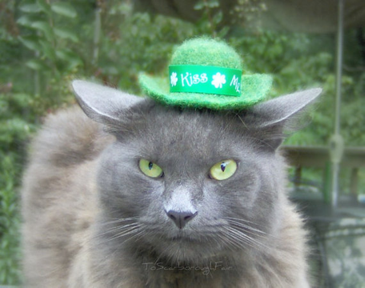

In [32]:
Image(filename='./demo/cat.png')

### Simple Energy Gradient with Sobel Filter

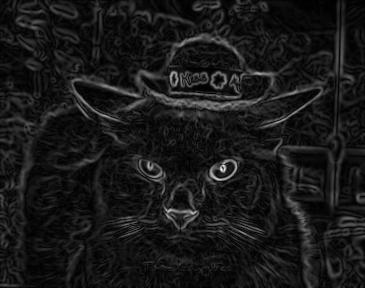

In [24]:
cat_img = misc.imread('./demo/cat.png')
eng = compute_eng_grad(cat_img)
misc.imsave('./demo/cat_eng_grad.png', eng)
Image(filename='./demo/cat_eng_grad.png')

### Simple Color Energy

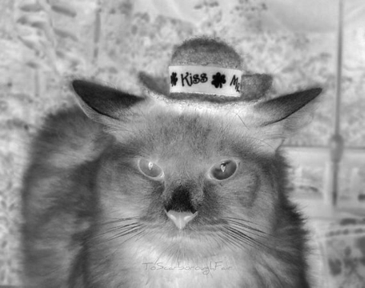

In [34]:
rgb_weights = [-3, 1, -3]
cat_img = misc.imread('./demo/cat.png')
eng = compute_eng_color(cat_img, rgb_weights)
misc.imsave('./demo/cat_eng_color.png', eng)
Image(filename='./demo/cat_eng_color.png')

### Total Energy

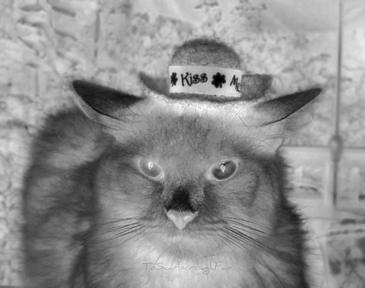

In [35]:
rgb_weights = [-3, 1, -3]
mask_weight = 10
cat_img = misc.imread('./demo/cat.png')
mask = np.zeros(cat_img.shape)
img4 = np.dstack((cat_img, mask))
eng = compute_eng(img4, rgb_weights, mask_weight)
misc.imsave('./demo/cat_eng_total.png', eng)
Image(filename='./demo/cat_eng_total.png')

## Intelligent Resize

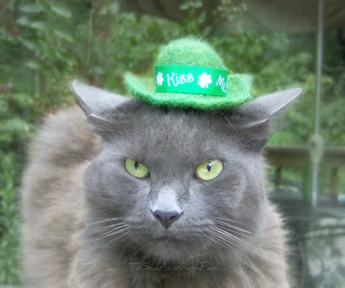

In [36]:
rgb_weights = [-3, 1, -3]
mask_weight = 10
cat_img = misc.imread('./demo/cat.png')
mask = np.zeros(cat_img.shape)

resized_img = intelligent_resize(cat_img, 20, 0, rgb_weights, mask, mask_weight)
misc.imsave('./demo/cat_shrunk.png', resized_img[:,:,0:3])
Image(filename='./demo/cat_shrunk.png')

In [ ]:
resized_img = intelligent_resize(cat_img, -150, 0, rgb_weights, mask, mask_weight)
misc.imsave('./demo/cat_grown.png', resized_img[:,:,0:3])